In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.signal
import scipy
import os
from tqdm import tqdm
import pandas as pd
tqdm.pandas()

In [2]:
def kde(x,y, w = 0.005):
    bins = len(x)
    xy = np.r_[x, y]
    hh,loc = scipy.histogram(xy, bins=bins)
    kernel = scipy.stats.norm.pdf((loc[1:]+loc[:-1]) * .5, 0, w)
    return scipy.signal.fftconvolve(hh, kernel, 'same')

# 64px vs 32px

In [3]:
df = pd.DataFrame()

In [4]:
HPATH_32px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px/H/avg_data/'
df['H_32px'] = np.array([np.loadtxt(f'{HPATH_32px}{file}') for file in tqdm(os.listdir(HPATH_32px)[0:85])]).flatten()

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [02:22<00:00,  1.68s/it]


In [5]:
HPATH_64px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px/H/avg_data/'
df['H_64px'] = np.array([np.loadtxt(f'{HPATH_64px}{file}') for file in tqdm(os.listdir(HPATH_64px)[0:85])]).flatten()

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [02:22<00:00,  1.68s/it]


In [6]:
SPATH_32px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px/S/avg_data/'
df['S_32px'] = np.array([np.loadtxt(f'{SPATH_32px}{file}') for file in tqdm(os.listdir(SPATH_32px)[0:85])]).flatten()

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [02:23<00:00,  1.69s/it]


In [7]:
SPATH_64px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px/S/avg_data/'
df['S_64px'] = np.array([np.loadtxt(f'{SPATH_64px}{file}') for file in tqdm(os.listdir(SPATH_64px)[0:85])]).flatten()
df

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [02:23<00:00,  1.69s/it]


,H_32px,H_64px,S_32px,S_64px
0,1.137192,0.931886,0.739092,1.267645
1,1.130752,0.928312,0.756777,1.254085
2,1.128266,0.932165,0.761810,1.278373
3,1.130555,0.928094,0.779481,1.267287
4,1.133091,0.922705,0.802505,1.252017
...,...,...,...,...
84999995,0.945226,0.506305,0.601154,0.074480
84999996,0.945263,0.503110,0.567070,0.067672
84999997,0.947402,0.503830,0.537914,0.069853
84999998,0.953845,0.505531,0.492749,0.068627


In [8]:
df_sample = df.sample(int(1e5))
df_sample

,H_32px,H_64px,S_32px,S_64px
46881190,0.860310,0.497706,0.487667,0.063527
13045117,1.025088,0.872134,0.576113,0.853457
545361,0.923125,0.730432,1.694763,1.974805
41949271,1.050164,0.734084,0.534979,0.377684
63757296,0.929926,0.551848,0.399727,0.171877
...,...,...,...,...
33622207,1.020102,0.672109,0.649806,0.353964
59471090,0.840595,0.394739,0.422737,-0.128481
27979400,0.982795,0.679343,0.436338,0.471242
47878674,1.005117,0.846582,1.186227,1.457787


In [9]:
%%time
df_sample['KDE_H32_H64'] = kde(df_sample.H_32px,df_sample.H_64px)
df_sample['KDE_H32_S32'] = kde(df_sample.H_32px,df_sample.S_32px)
df_sample['KDE_H32_S64'] = kde(df_sample.H_32px,df_sample.S_64px)
df_sample['KDE_H64_S32'] = kde(df_sample.H_64px,df_sample.S_32px)
df_sample['KDE_H64_S64'] = kde(df_sample.H_64px,df_sample.S_64px)
df_sample['KDE_S32_S64'] = kde(df_sample.S_32px,df_sample.S_64px)

C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  after removing the cwd from sys.path.


Wall time: 471 ms


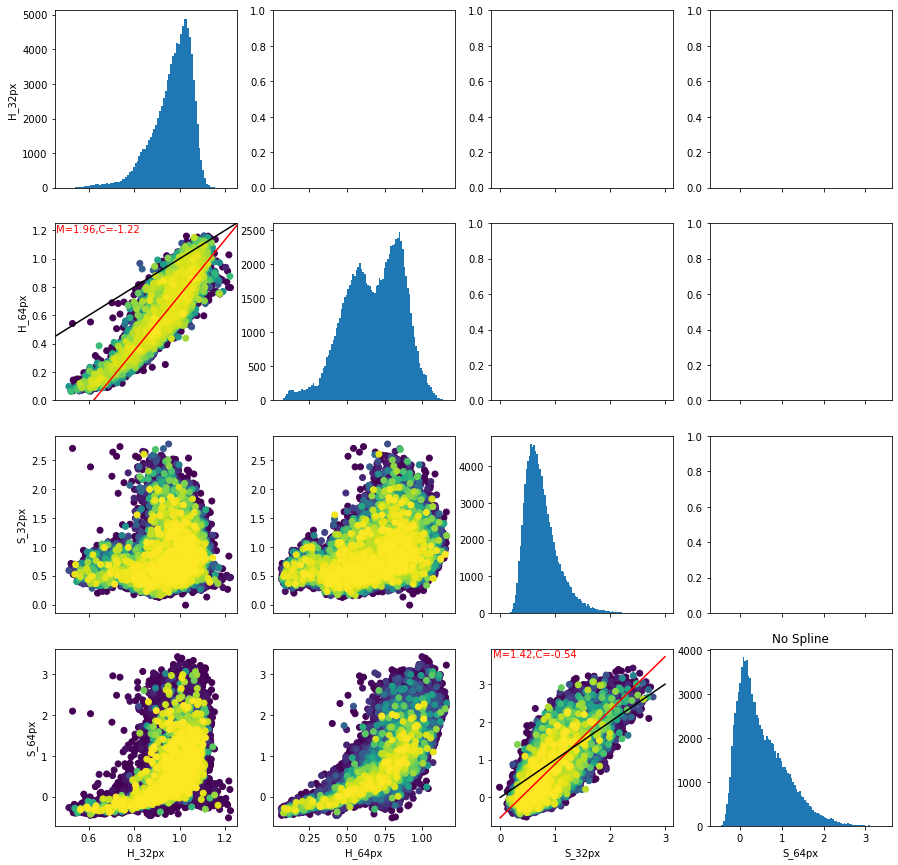

Wall time: 53.3 s


In [10]:
%%time
f,ax = plt.subplots(4,4, figsize=(15,15),sharex='col')

ax[0,0].hist(df_sample['H_32px'], bins=100)
ax[1,1].hist(df_sample['H_64px'], bins=100)
ax[2,2].hist(df_sample['S_32px'], bins=100)
ax[3,3].hist(df_sample['S_64px'], bins=100)

df_sample = df_sample.sort_values(by=['KDE_H32_H64'])
ax[1,0].scatter(df_sample['H_32px'],df_sample['H_64px'],c=df_sample['KDE_H32_H64'])
z = np.polyfit(df_sample['H_32px'], df_sample['H_64px'], 1)
p = np.poly1d(z)
ax[1,0].plot([0,2], p([0,2]), c='r')
ax[1,0].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[1,0].transAxes,c='r')
ax[1,0].plot([0,2],[0,2],c='k')
df_sample = df_sample.sort_values(by=['KDE_H32_S32'])
ax[2,0].scatter(df_sample['H_32px'],df_sample['S_32px'],c=df_sample['KDE_H32_S32'])
df_sample = df_sample.sort_values(by=['KDE_H32_S64'])
ax[3,0].scatter(df_sample['H_32px'],df_sample['S_64px'],c=df_sample['KDE_H32_S64'])

df_sample = df_sample.sort_values(by=['KDE_H64_S32'])
ax[2,1].scatter(df_sample['H_64px'],df_sample['S_32px'],c=df_sample['KDE_H64_S32'])
df_sample = df_sample.sort_values(by=['KDE_H64_S64'])
ax[3,1].scatter(df_sample['H_64px'],df_sample['S_64px'],c=df_sample['KDE_H64_S64'])

df_sample = df_sample.sort_values(by=['KDE_S32_S64'])
ax[3,2].scatter(df_sample['S_32px'],df_sample['S_64px'],c=df_sample['KDE_S32_S64'])
z = np.polyfit(df_sample['S_32px'], df_sample['S_64px'], 1)
p = np.poly1d(z)
ax[3,2].plot([0,3], p([0,3]), c='r')
ax[3,2].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[3,2].transAxes,c='r')
ax[3,2].plot([0,3],[0,3],c='k')

ax[0,0].set_ylabel('H_32px')
ax[1,0].set_ylabel('H_64px')
ax[2,0].set_ylabel('S_32px')
ax[3,0].set_ylabel('S_64px')

ax[3,0].set_xlabel('H_32px')
ax[3,1].set_xlabel('H_64px')
ax[3,2].set_xlabel('S_32px')
ax[3,3].set_xlabel('S_64px')

ax[0,0].set_xlim([0.45,1.25])
ax[1,0].set_ylim([0,1.25])

plt.title('No Spline')
plt.savefig('D:\Workshop\PhD\Images\CNN Results PPMAP\64pxVS32pxwSpline.png')
plt.show()

# 64px vs 32px no spline

In [11]:
df = pd.DataFrame()

In [12]:
HPATH_32px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_nospline/H/avg_data/'
df['H_32px'] = np.array([np.loadtxt(f'{HPATH_32px}{file}') for file in tqdm(os.listdir(HPATH_32px)[0:85])]).flatten()

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [02:26<00:00,  1.73s/it]


In [13]:
HPATH_64px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px/H/avg_data/'
df['H_64px'] = np.array([np.loadtxt(f'{HPATH_64px}{file}') for file in tqdm(os.listdir(HPATH_64px)[0:85])]).flatten()

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [02:09<00:00,  1.52s/it]


In [14]:
SPATH_32px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_nospline/S/avg_data/'
df['S_32px'] = np.array([np.loadtxt(f'{SPATH_32px}{file}') for file in tqdm(os.listdir(SPATH_32px)[0:85])]).flatten()

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [02:23<00:00,  1.69s/it]


In [15]:
SPATH_64px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px/S/avg_data/'
df['S_64px'] = np.array([np.loadtxt(f'{SPATH_64px}{file}') for file in tqdm(os.listdir(SPATH_64px)[0:85])]).flatten()
df

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [02:21<00:00,  1.67s/it]


,H_32px,H_64px,S_32px,S_64px
0,1.137192,0.931886,0.739092,1.267645
1,1.130752,0.928312,0.756777,1.254085
2,1.128266,0.932165,0.761810,1.278373
3,1.130555,0.928094,0.779481,1.267287
4,1.133091,0.922705,0.802505,1.252017
...,...,...,...,...
84999995,0.945226,0.506305,0.601154,0.074480
84999996,0.945263,0.503110,0.567070,0.067672
84999997,0.947402,0.503830,0.537914,0.069853
84999998,0.953845,0.505531,0.492749,0.068627


In [16]:
df_sample = df.sample(int(1e5))
df_sample

,H_32px,H_64px,S_32px,S_64px
15950657,1.074489,0.891766,0.730581,0.754672
19650680,1.037568,0.781174,0.758927,0.779168
70076695,0.800138,0.324836,0.591081,-0.198980
47731346,0.834715,0.438263,0.301114,-0.069305
46854365,0.947611,0.490649,0.441897,0.013848
...,...,...,...,...
66109873,0.788638,0.398627,0.588825,-0.092600
30520549,1.057742,0.843815,0.738405,0.512245
46723055,0.843804,0.443978,0.713893,-0.022448
24091077,0.983267,0.664382,0.519395,0.318812


In [17]:
%%time
df_sample['KDE_H32_H64'] = kde(df_sample.H_32px,df_sample.H_64px)
df_sample['KDE_H32_S32'] = kde(df_sample.H_32px,df_sample.S_32px)
df_sample['KDE_H32_S64'] = kde(df_sample.H_32px,df_sample.S_64px)
df_sample['KDE_H64_S32'] = kde(df_sample.H_64px,df_sample.S_32px)
df_sample['KDE_H64_S64'] = kde(df_sample.H_64px,df_sample.S_64px)
df_sample['KDE_S32_S64'] = kde(df_sample.S_32px,df_sample.S_64px)

C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  after removing the cwd from sys.path.


Wall time: 365 ms


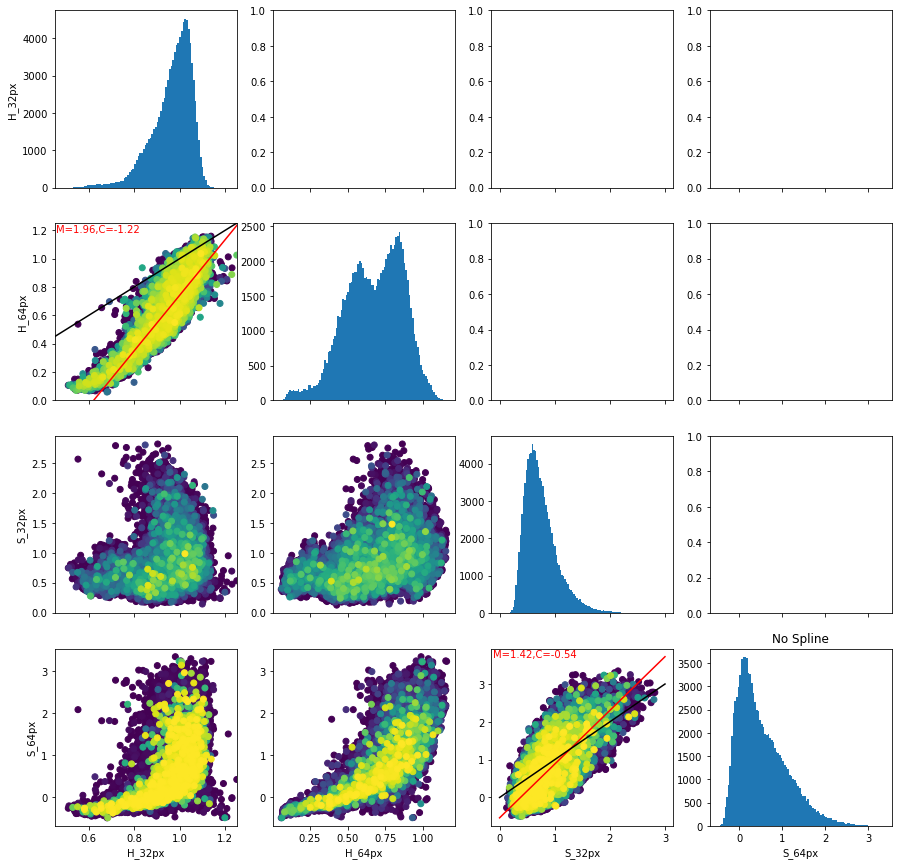

Wall time: 54.2 s


In [18]:
%%time
f,ax = plt.subplots(4,4, figsize=(15,15),sharex='col')

ax[0,0].hist(df_sample['H_32px'], bins=100)
ax[1,1].hist(df_sample['H_64px'], bins=100)
ax[2,2].hist(df_sample['S_32px'], bins=100)
ax[3,3].hist(df_sample['S_64px'], bins=100)

df_sample = df_sample.sort_values(by=['KDE_H32_H64'])
ax[1,0].scatter(df_sample['H_32px'],df_sample['H_64px'],c=df_sample['KDE_H32_H64'])
z = np.polyfit(df_sample['H_32px'], df_sample['H_64px'], 1)
p = np.poly1d(z)
ax[1,0].plot([0,2], p([0,2]), c='r')
ax[1,0].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[1,0].transAxes,c='r')
ax[1,0].plot([0,2],[0,2],c='k')
df_sample = df_sample.sort_values(by=['KDE_H32_S32'])
ax[2,0].scatter(df_sample['H_32px'],df_sample['S_32px'],c=df_sample['KDE_H32_S32'])
df_sample = df_sample.sort_values(by=['KDE_H32_S64'])
ax[3,0].scatter(df_sample['H_32px'],df_sample['S_64px'],c=df_sample['KDE_H32_S64'])

df_sample = df_sample.sort_values(by=['KDE_H64_S32'])
ax[2,1].scatter(df_sample['H_64px'],df_sample['S_32px'],c=df_sample['KDE_H64_S32'])
df_sample = df_sample.sort_values(by=['KDE_H64_S64'])
ax[3,1].scatter(df_sample['H_64px'],df_sample['S_64px'],c=df_sample['KDE_H64_S64'])

df_sample = df_sample.sort_values(by=['KDE_S32_S64'])
ax[3,2].scatter(df_sample['S_32px'],df_sample['S_64px'],c=df_sample['KDE_S32_S64'])
z = np.polyfit(df_sample['S_32px'], df_sample['S_64px'], 1)
p = np.poly1d(z)
ax[3,2].plot([0,3], p([0,3]), c='r')
ax[3,2].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[3,2].transAxes,c='r')
ax[3,2].plot([0,3],[0,3],c='k')

ax[0,0].set_ylabel('H_32px')
ax[1,0].set_ylabel('H_64px')
ax[2,0].set_ylabel('S_32px')
ax[3,0].set_ylabel('S_64px')

ax[3,0].set_xlabel('H_32px')
ax[3,1].set_xlabel('H_64px')
ax[3,2].set_xlabel('S_32px')
ax[3,3].set_xlabel('S_64px')

ax[0,0].set_xlim([0.45,1.25])
ax[1,0].set_ylim([0,1.25])

plt.title('No Spline')
plt.savefig('D:\Workshop\PhD\Images\CNN Results PPMAP\64pxVS32pxNoSpline.png')
plt.show()

# 64px vs 64px>32px

In [19]:
df = pd.DataFrame()

In [20]:
HPATH_32px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_to_32px/H/avg_data/'
df['H_32px'] = np.array([np.loadtxt(f'{HPATH_32px}{file}') for file in tqdm(os.listdir(HPATH_32px)[0:85])]).flatten()

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [03:13<00:00,  2.28s/it]


In [21]:
HPATH_64px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px/H/avg_data/'
df['H_64px'] = np.array([np.loadtxt(f'{HPATH_64px}{file}') for file in tqdm(os.listdir(HPATH_64px)[0:85])]).flatten()

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [03:02<00:00,  2.15s/it]


In [22]:
SPATH_32px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_to_32px/S/avg_data/'
df['S_32px'] = np.array([np.loadtxt(f'{SPATH_32px}{file}') for file in tqdm(os.listdir(SPATH_32px)[0:85])]).flatten()

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [03:05<00:00,  2.18s/it]


In [23]:
SPATH_64px = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px/S/avg_data/'
df['S_64px'] = np.array([np.loadtxt(f'{SPATH_64px}{file}') for file in tqdm(os.listdir(SPATH_64px)[0:85])]).flatten()
df

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [02:49<00:00,  1.99s/it]


,H_32px,H_64px,S_32px,S_64px
0,0.835795,0.931886,1.042145,1.267645
1,0.846375,0.928312,1.015743,1.254085
2,0.847870,0.932165,1.036227,1.278373
3,0.844117,0.928094,1.069077,1.267287
4,0.847032,0.922705,1.094284,1.252017
...,...,...,...,...
84999995,0.652135,0.506305,0.368747,0.074480
84999996,0.655641,0.503110,0.353407,0.067672
84999997,0.658119,0.503830,0.342444,0.069853
84999998,0.648376,0.505531,0.329679,0.068627


In [24]:
df_sample = df.sample(int(1e5))
df_sample

,H_32px,H_64px,S_32px,S_64px
73857616,0.479053,0.466491,0.380947,0.136084
41928640,0.732303,0.649742,0.618404,0.300995
10613805,0.884582,0.894193,0.988737,0.927320
71152700,0.140145,0.142829,0.242774,-0.223089
75663085,0.597796,0.561859,0.400847,0.280693
...,...,...,...,...
1768921,0.855233,0.839942,0.956578,0.988360
2957946,0.939606,1.079415,1.690824,1.884792
23564329,0.771187,0.769541,1.135848,1.052592
45986753,0.808276,0.702332,0.818899,0.538259


In [35]:
%%time
df_sample['KDE_H32_H64'] = kde(df_sample.H_32px,df_sample.H_64px, w=0.0015)
df_sample['KDE_H32_S32'] = kde(df_sample.H_32px,df_sample.S_32px)
df_sample['KDE_H32_S64'] = kde(df_sample.H_32px,df_sample.S_64px)
df_sample['KDE_H64_S32'] = kde(df_sample.H_64px,df_sample.S_32px)
df_sample['KDE_H64_S64'] = kde(df_sample.H_64px,df_sample.S_64px)
df_sample['KDE_S32_S64'] = kde(df_sample.S_32px,df_sample.S_64px)

C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  after removing the cwd from sys.path.


Wall time: 493 ms


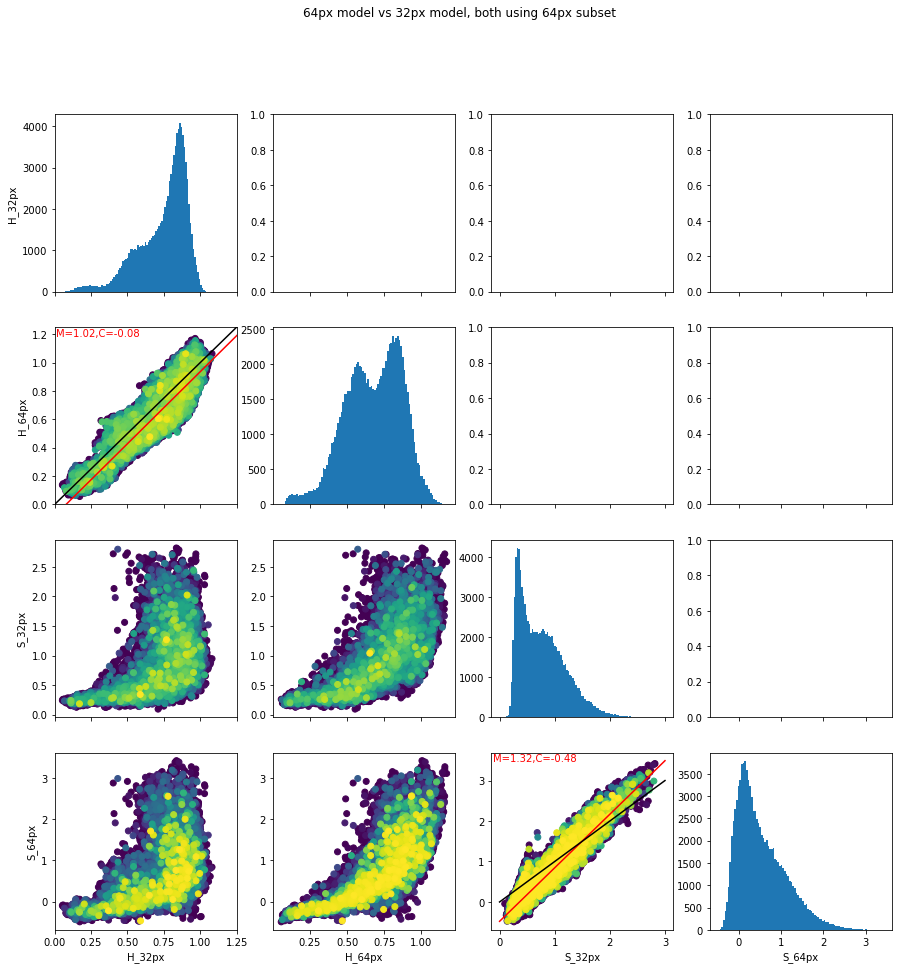

Wall time: 1min 19s


In [36]:
%%time
f,ax = plt.subplots(4,4, figsize=(15,15),sharex='col')

ax[0,0].hist(df_sample['H_32px'], bins=100)
ax[1,1].hist(df_sample['H_64px'], bins=100)
ax[2,2].hist(df_sample['S_32px'], bins=100)
ax[3,3].hist(df_sample['S_64px'], bins=100)

df_sample = df_sample.sort_values(by=['KDE_H32_H64'])
ax[1,0].scatter(df_sample['H_32px'],df_sample['H_64px'],c=df_sample['KDE_H32_H64'])
z = np.polyfit(df_sample['H_32px'], df_sample['H_64px'], 1)
p = np.poly1d(z)
ax[1,0].plot([0,2], p([0,2]), c='r')
ax[1,0].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[1,0].transAxes,c='r')
ax[1,0].plot([0,2],[0,2],c='k')
df_sample = df_sample.sort_values(by=['KDE_H32_S32'])
ax[2,0].scatter(df_sample['H_32px'],df_sample['S_32px'],c=df_sample['KDE_H32_S32'])
df_sample = df_sample.sort_values(by=['KDE_H32_S64'])
ax[3,0].scatter(df_sample['H_32px'],df_sample['S_64px'],c=df_sample['KDE_H32_S64'])

df_sample = df_sample.sort_values(by=['KDE_H64_S32'])
ax[2,1].scatter(df_sample['H_64px'],df_sample['S_32px'],c=df_sample['KDE_H64_S32'])
df_sample = df_sample.sort_values(by=['KDE_H64_S64'])
ax[3,1].scatter(df_sample['H_64px'],df_sample['S_64px'],c=df_sample['KDE_H64_S64'])

df_sample = df_sample.sort_values(by=['KDE_S32_S64'])
ax[3,2].scatter(df_sample['S_32px'],df_sample['S_64px'],c=df_sample['KDE_S32_S64'])
z = np.polyfit(df_sample['S_32px'], df_sample['S_64px'], 1)
p = np.poly1d(z)
ax[3,2].plot([0,3], p([0,3]), c='r')
ax[3,2].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[3,2].transAxes,c='r')
ax[3,2].plot([0,3],[0,3],c='k')

ax[0,0].set_ylabel('H_32px')
ax[1,0].set_ylabel('H_64px')
ax[2,0].set_ylabel('S_32px')
ax[3,0].set_ylabel('S_64px')

ax[3,0].set_xlabel('H_32px')
ax[3,1].set_xlabel('H_64px')
ax[3,2].set_xlabel('S_32px')
ax[3,3].set_xlabel('S_64px')

ax[0,0].set_xlim([0,1.25])
ax[1,0].set_ylim([0,1.25])

plt.suptitle('64px model vs 32px model, both using 64px subset')
plt.savefig('D:/Workshop/PhD/Images/CNN Results PPMAP/64pxVS32pxReduced.png')
plt.show()